<a href="https://colab.research.google.com/github/Gabriel325896/Analisis-Numerico/blob/main/Despacho_PSO_DemandaFija_CoefDif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Despacho electrico

**Despacho Energia Electrica:**

Cuando se habla de sistemas de energía eléctrica, comúnmente se muestran esquemas simplificados donde un sistema generador envía energía a una carga eléctrica a través de un sistema de transmisión; no lejos de la realidad, este sistema esconde el proceso por el cual se mueve económicamente la energía eléctrica, un sistema más complejo donde todos los entes en la cadena están relacionados.

A este proceso economico se lo conoce como despacho de energia electrica.

El despacho es la programación de la generación para cubrir la demanda esperada, de tal forma que para cada hora se utilicen los recursos de menor precio, cumpliendo con las condiciones límites que tiene el sistema como son las inflexibilidades y las restricciones.


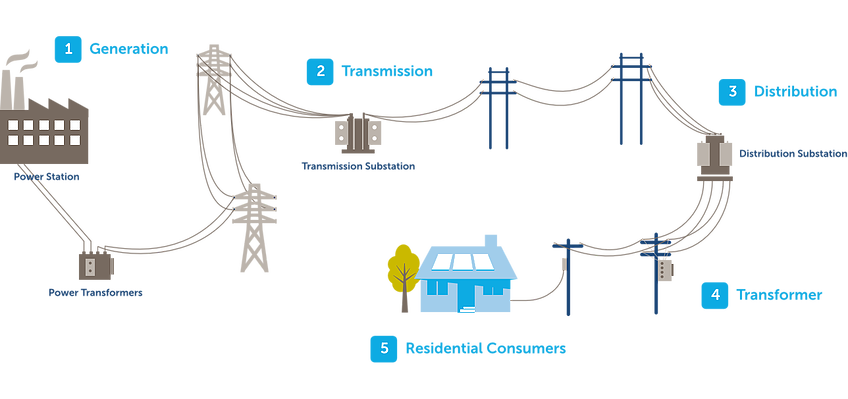

## Librerias utilizadas


In [ ]:
# Librerias:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

# Modelo Matematico

$$ min. \; \sum_{i = 1}^{n_{g}} c_{i}P^{2}_{it} + b_iP_{it} + a_{i} \; , \; t = 1,2,...,24
$$   
Sujeto a:
$$\sum_{i = 1}^{n_{g}}P_{it} = PD_{t}  \; , \; t = 1,2,...,24$$


$$Pmin_{i} \leq P_{it} \leq Pmax_{i} \; , \; t = 1,2,...,24$$



# Perfil de Demanda

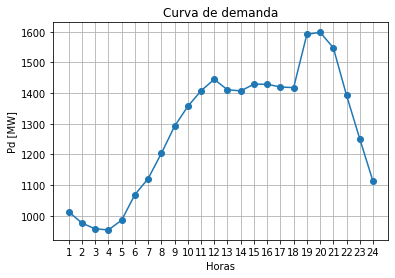

In [ ]:
df= [1013.506, 976.565, 957.746, 954.244, 985.864, 1068.756, 
     1121.099, 1203.345, 1291.66, 1356.6, 1407.396, 1444.813,
     1410.796, 1407.26, 1429.003, 1428.884, 1419.857, 1417.885,
     1591.081, 1598.272, 1547.629, 1392.487, 1250.486, 1112.306]
     
x=range(1,25)
plt.plot(x,df,'-o',label='Demanda real')
plt.xticks(np.arange(1, 25, 1))
plt.grid()
plt.title('Curva de demanda')
plt.xlabel('Horas')
plt.ylabel('Pd [MW]')
plt.show()

# Funcion de costos

## Diagrama de flujo Función de Costos

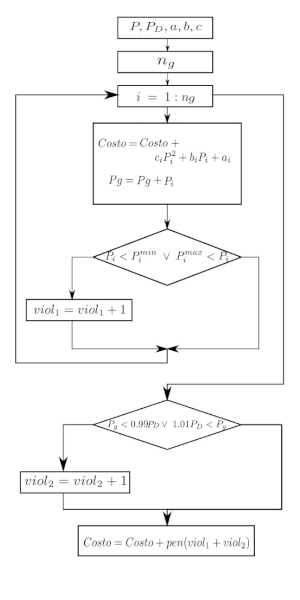

## Código

In [ ]:
# Funcion objetivo (minimizar)
def fmin(P,PD,a,b,c,Pb):
  pen =  1000000000000
  ng = len(P) #Número de Generadores
  np = len(P[0]) #Numero de particulas
  costos = [] 
  for j in range(0,np):
    costo = 0
    Pg = 0  
    viol_1 = 0
    for i in range(0,ng):
      costo = c[i]*((P[i][j])**2) + b[i]*P[i][j] + a[i] + costo ##Función de Costos
      Pg = P[i][j] + Pg
      if P[i][j] < Pb[i][0] or Pb[i][1] < P[i][j]:
          viol_1 = viol_1 + 1
    if  Pg < 0.99*PD or Pg > 1.01*PD:
      viol_2 = 1
    else:
      viol_2 = 0
    costo = costo + pen*(viol_2 + viol_1)
    costos.append(costo)
  return costos

# P.S.O. para despacho



Pasos para el metodo de PSO

$$v_{id}= v_{id}+c1*rand()*(p_{id}-x_{id}) +c_2*rand()(p_{gd}-x_{id}) \; \; \;(1)$$

$$x_{id}= x_{id}+v_{id} \; \; \; (2)$$

1° Inicializar una población con posiciones y velocidades aleatorias en d dimensiones dadas por el problema.

2° Para cada partícula evaluar la optimización deseada de la función fitness en d variables.

3° Compare la evaluación de la función con el mejor punto de la misma, pbest. Si el nuevo valor es mejor que el pbest, ese pbset será el nuevo valor.

4° Cambiar la velocidad y la posición de la partícula de acuerdo con las ecuaciones 1 y 2.

5° Repetir desde el ítem 2) teniendo en cuenta un criterio de parada suficientemente bueno o considerando un número máximo de iteraciones.

## Diagrama de flujo PSO

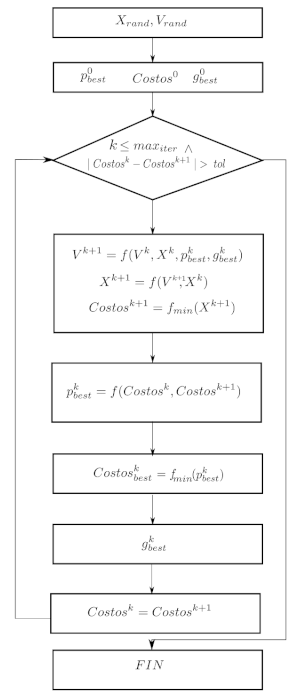

## Código Implementación PSO

In [ ]:
def ejecutar_despacho(PD,hh):
    # Pmin - Pmax
    P1b = [10,500] # MW
    P2b = [12,365] # MW
    P3b = [50,720] # MW
    P4b = [20,631] # MW
    Pb = [P1b, P2b, P3b, P4b]
    a = [0, 0, 0, 0]
    b = [2, 1.75, 1, 3.25]
    c = [0.00375, 0.01750, 0.06250, 0.00834]
    # Incializar particulas
    n_particles = 500# 3000 antes
    min = 0
    max = 700
    nng = len(a)
    X = np.random.rand(nng, n_particles) * (max - min) + min #Posición aleatoria de Particulas
    V = np.random.randn(nng, n_particles) * 0.01 #Velocidad aleatoria inicial de Particulas
    # Pbest y Gbest -> Inicial:
    pbest = X 
    f_0 = np.array(fmin(X,PD,a,b,c,Pb)) 
    min_v = f_0.min() # encontrar el minimo valor
    ind_min = np.where(f_0 == min_v)[0][0]
    gbest = X[:,ind_min] # coordenada para g best en el plano
    #Hiperparametros
    c1 = 0.1
    c2 = 0.3
    w = 0.002
    n = 5000 # cant. max de iteraciones
    j = 1 #contador que inicia en 0
    Conv_t = []
    while True:
        r = np.random.rand(2) # [r1 r2] 
        r1 = r[0] ; r2 = r[1] 
        V = w*V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1) - X) #Función de actualización de velocidad de PSO
        X = X + V
        f_k = np.array(fmin(X,PD,a,b,c,Pb))
        for i in range(0,n_particles):
            if f_k[i] < f_0[i]:
                pbest[:,i] = X[:,i]
        f_gbest = np.array(fmin(pbest,PD,a,b,c,Pb))
        min_ant = min_v
        Conv_t.append(min_ant)
        min_v = f_gbest.min() # encontrar el minimo
        ind_min = np.where(f_gbest == min_v)[0][0] # el lugar donde esta el minimo
        gbest = pbest[:,ind_min] # coordenada para g best
        f_0 = f_k 
        j = j + 1
        if j >= n or abs(min_v - min_ant) < 1e-9:
            Conv_t.append(min_v)
            break
    plt.plot(Conv_t, 'o-')
    plt.xticks(np.arange(0, len(Conv_t), 1))
    plt.grid()
    plt.title('Funcion de costo en hora ' + str(hh) )
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo [$]')
    plt.show()
    return gbest

# Resultados



## Diagrama de Flujo Resultados

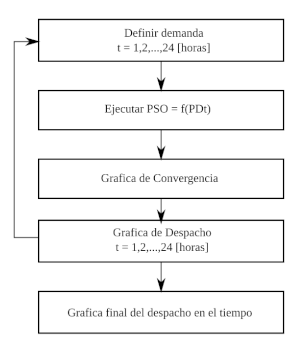

##Código Resultados

1013.506


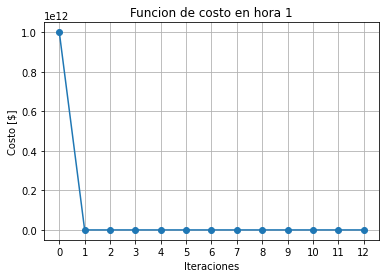

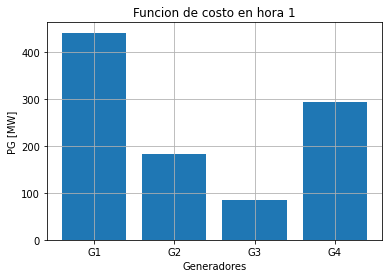

1003.4937366244822
976.565


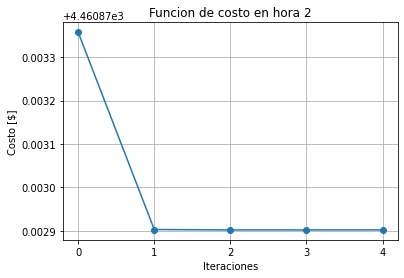

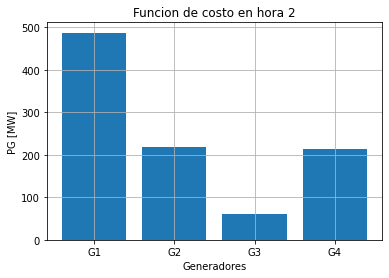

981.8832922937767
957.746


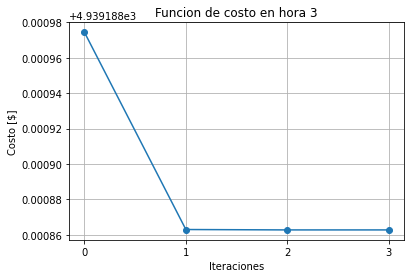

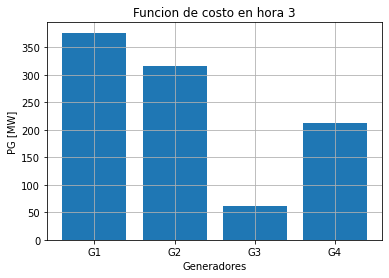

965.1360247480409
954.244


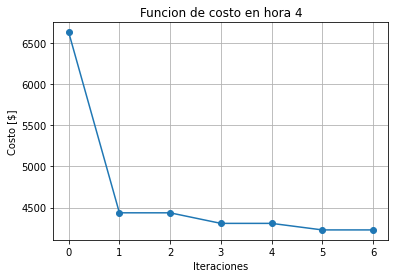

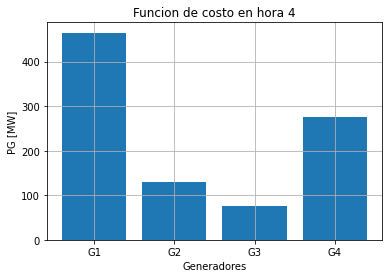

946.3380503590253
985.864


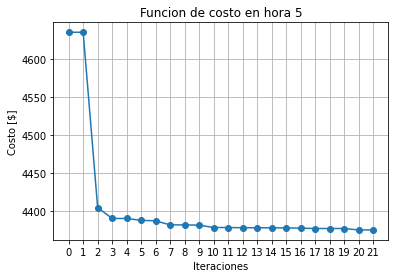

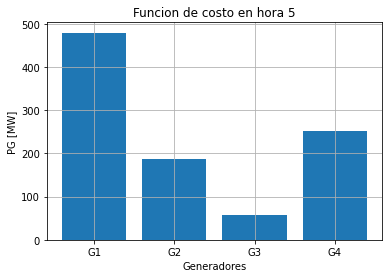

976.1487912247153
1068.756


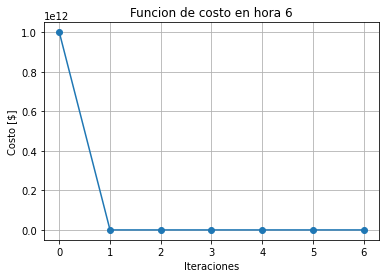

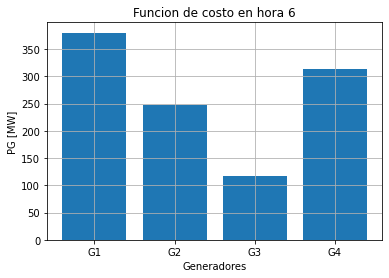

1058.6970814832632
1121.099


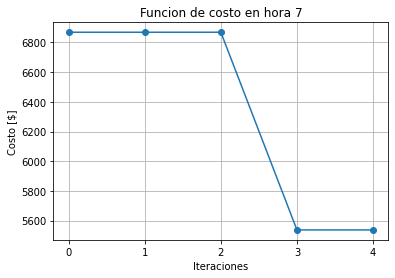

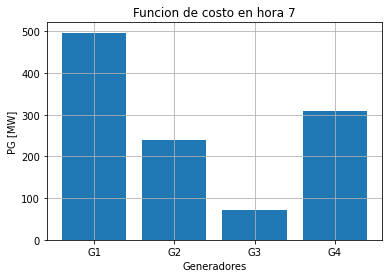

1117.1237284197857
1203.345


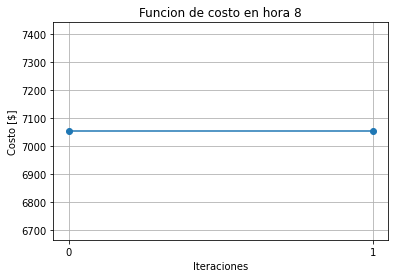

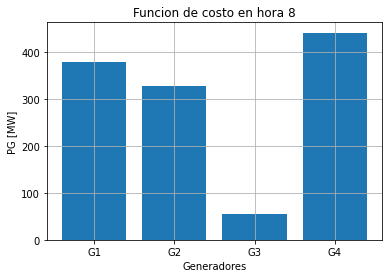

1203.4160571467637
1291.66


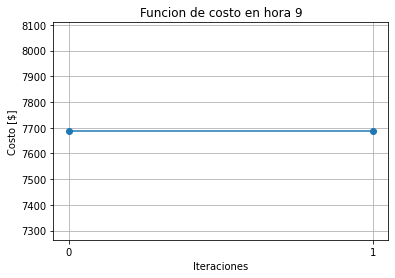

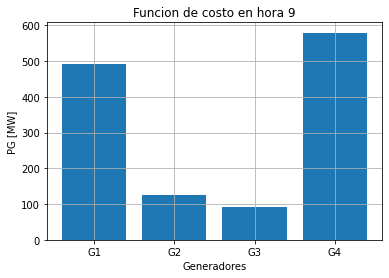

1287.8143352076063
1356.6


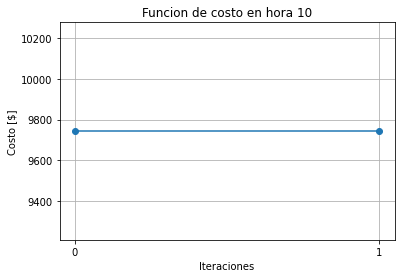

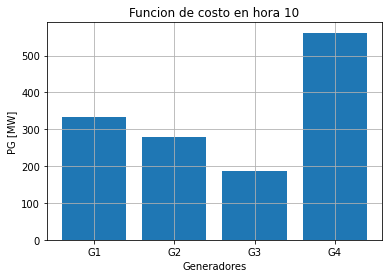

1359.3063956964927
1407.396


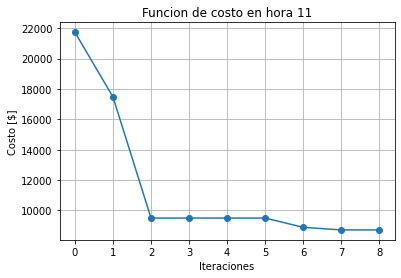

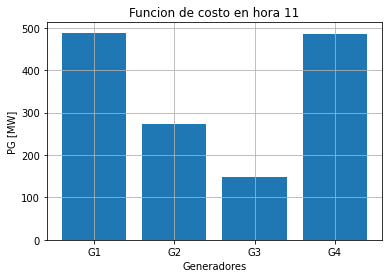

1394.3679988167005
1444.813


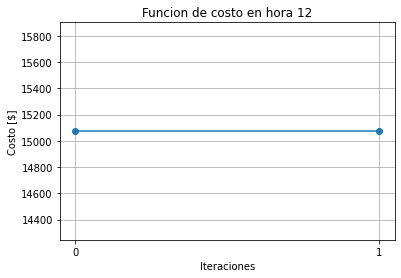

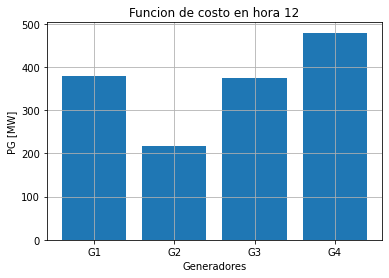

1449.3904142863246
1410.796


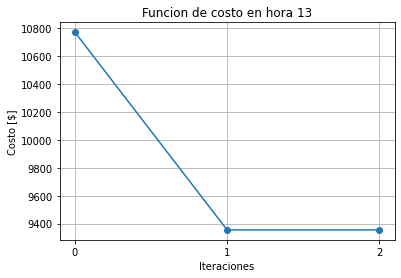

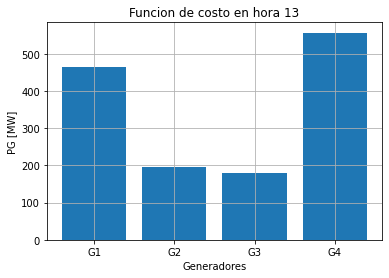

1397.5579246279262
1407.26


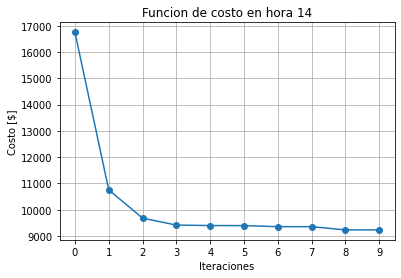

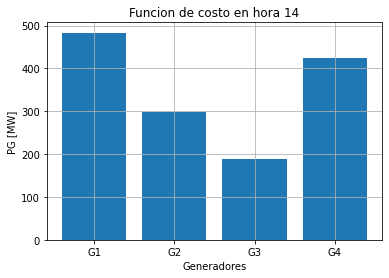

1395.876719640582
1429.003


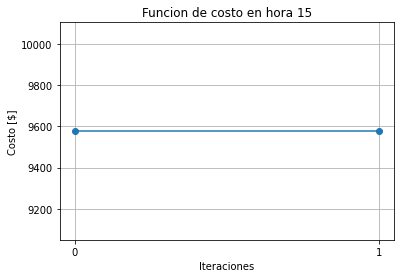

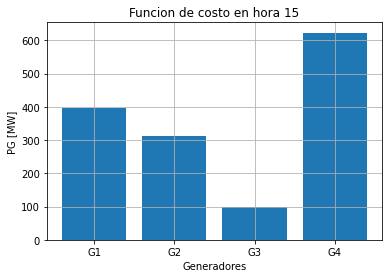

1427.7222680279508
1428.884


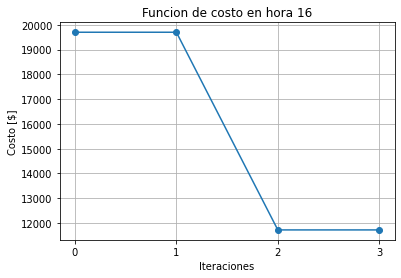

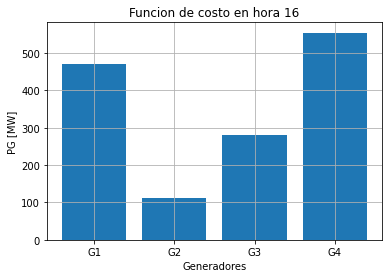

1416.9200138653582
1419.857


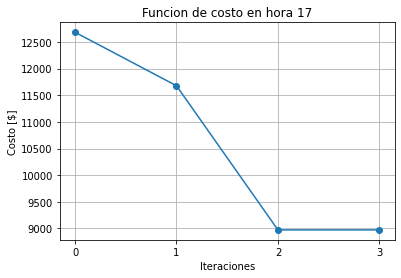

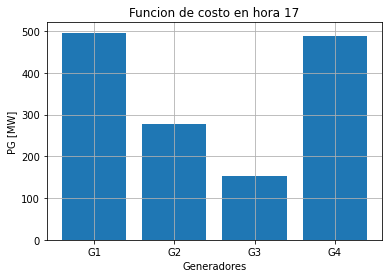

1416.9864295128762
1417.885


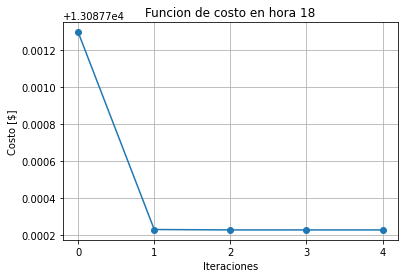

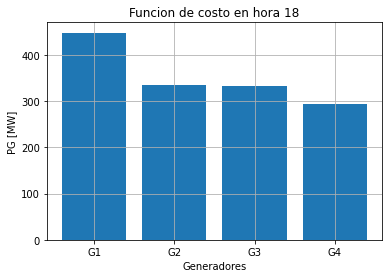

1407.6621979854851
1591.081


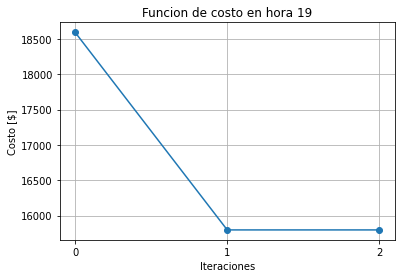

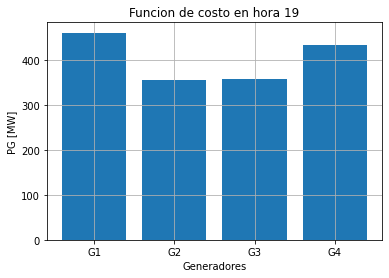

1603.9657180362894
1598.272


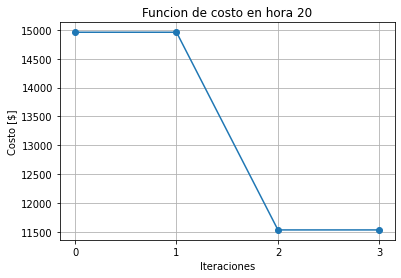

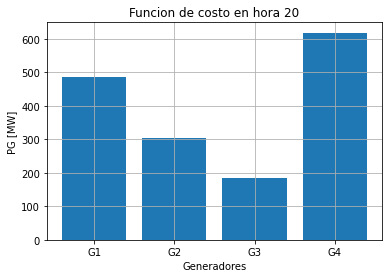

1593.9835650584553
1547.629


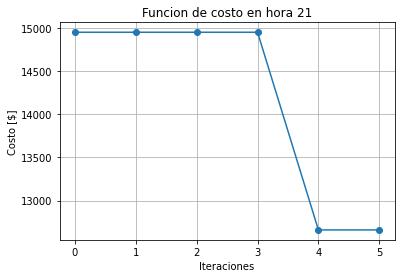

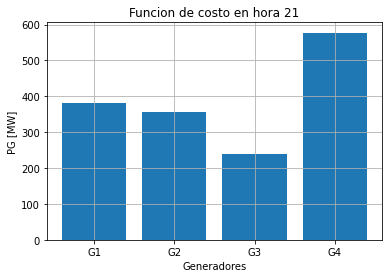

1555.5073622581904
1392.487


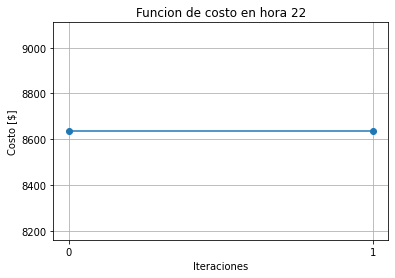

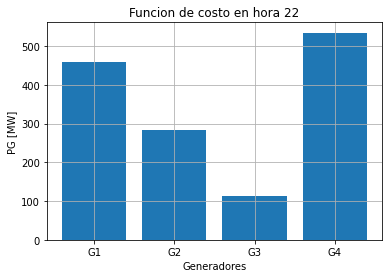

1389.563916230056
1250.486


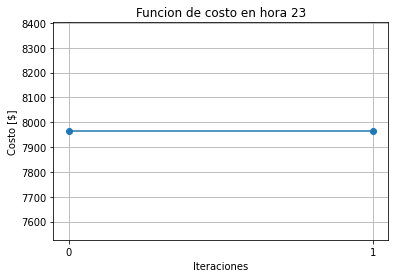

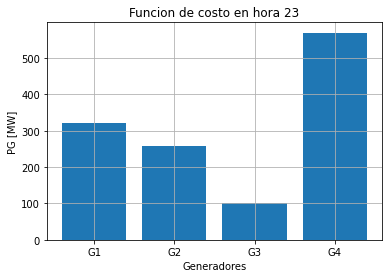

1252.1832265091778
1112.306


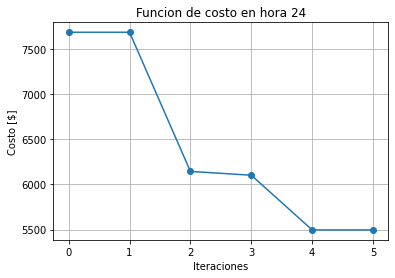

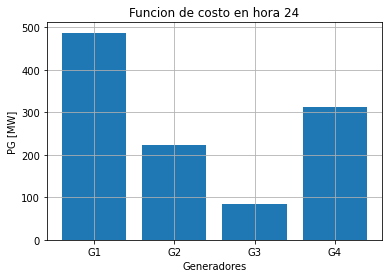

1108.1243491992766
[1003.4937366244822, 981.8832922937767, 965.1360247480409, 946.3380503590253, 976.1487912247153, 1058.6970814832632, 1117.1237284197857, 1203.4160571467637, 1287.8143352076063, 1359.3063956964927, 1394.3679988167005, 1449.3904142863246, 1397.5579246279262, 1395.876719640582, 1427.7222680279508, 1416.9200138653582, 1416.9864295128762, 1407.6621979854851, 1603.9657180362894, 1593.9835650584553, 1555.5073622581904, 1389.563916230056, 1252.1832265091778, 1108.1243491992766]


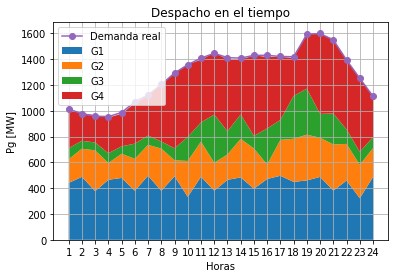

In [ ]:
nd = len(df)
Gen_t = []
Val_gen = []
G = []
ng = 4


for i in range(ng):
  G.append([])

for i in range(nd):
    demanda_i = df[i]
    print(demanda_i)
    Xgen = ejecutar_despacho(demanda_i,i+1)
    Plot_bar = []
    for j in range(ng):
        G[j].append(Xgen[j])
        Plot_bar.append('G'+str(j+1))
    plt.bar(Plot_bar,Xgen)
    plt.title('Funcion de costo en hora ' + str(i+1))
    plt.xlabel('Generadores')
    plt.ylabel('PG [MW]')
    plt.grid()
    plt.show()
    Gen_t.append(Xgen)
    Val_gen.append(sum(Xgen))
    print(sum(Xgen))

print(Val_gen)


plt.stackplot(x,G,labels=Plot_bar)
plt.plot(x, df,'-o',label='Demanda real')
plt.legend(loc='upper left')
plt.xticks(np.arange(1, 25, 1))
plt.grid()
plt.title('Despacho en el tiempo')
plt.xlabel('Horas')
plt.ylabel('Pg [MW]')
plt.show()
